# Análises de indicadores - Estoque

#### Importanando as bibliotecas

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import datetime

#### Importando os arquivos xlsx

In [1]:
path = 'dados/Tarefas/'
arquivos = os.listdir(path)
arquivos

['Tarefas_01-03_20-03.xlsx',
 'Tarefas_10-02_28-02.xlsx',
 'Tarefas_10-04_23-04.xlsx',
 'Tarefas_20-01_09-02.xlsx',
 'Tarefas_21-03_09-04.xlsx']

In [3]:
lista = []

for n in range(0,len(arquivos)):
    file = path+arquivos[n]
    print(file)
    #c_time = time.strftime("%d/%m/%Y", time.strptime(time.ctime(os.path.getmtime(path))))
    locals()['dados%s' %n] = pd.read_excel(
        file,
        usecols=('D:I,L:M'),
        names=[
            'autor',
            'data_criacao',
            'hora_criacao',
            'pd_origem',
            'pd_destino',
            'produto',
            'tipo_estoque',
            'desc_tipo_estoque'
            ]
            )
    #locals()['dados%s' %n]['data'] = c_time
    lista.append(locals()['dados%s' %n])

dados/Tarefas/Tarefas_01-03_20-03.xlsx
dados/Tarefas/Tarefas_10-02_28-02.xlsx
dados/Tarefas/Tarefas_10-04_23-04.xlsx
dados/Tarefas/Tarefas_20-01_09-02.xlsx
dados/Tarefas/Tarefas_21-03_09-04.xlsx


In [4]:
tarefas = pd.concat(lista)

In [5]:
path = 'dados/'
file_estoque = 'EXPORT_MON_21-04.xlsx'
file_posicoes = 'Posicoes.xlsx'
file_mb51_sa0309 = 'EXPORT_MB51_SA0309.xlsx'
file_mb51_sa0192 = 'EXPORT_MB51_SA0192.xlsx'

In [6]:
estoque = pd.read_excel(path+file_estoque, dtype={'Unidade comercial':'string'}, usecols=('A:F,I:J'))

In [7]:
posicoes = pd.read_excel(path+file_posicoes)
posicoes.head(3)

,Pos,Tipo
0,4,Virtual
1,A-01-6,Rack
2,A-03-3,Rack


In [8]:
mb52_sa0309 = pd.read_excel(path+file_mb51_sa0309)

In [41]:
mb52_sa0309.sample(5)

,Material,Centro,Depósito,Tipo de movimento,Estoque especial,Doc.material,Item doc.material,Data de lançamento,Qtd. UM registro,UM registro
1228,SA0309,P703,5,101,NaN,5000497002,1,2022-04-07,150.0,KG
754,SA0309,P703,5,101,NaN,5000529136,1,2022-04-12,147.2,KG
494,SA0309,P703,5,601,NaN,4901625195,12,2022-04-13,-147.8,KG
752,SA0309,P703,5,101,NaN,5000529106,1,2022-04-12,145.4,KG
1327,SA0309,P703,5,601,NaN,4901502378,14,2022-04-07,-151.2,KG


In [10]:
tarefas.head(1)

,autor,data_criacao,hora_criacao,pd_origem,pd_destino,produto,tipo_estoque,desc_tipo_estoque
0,SP3CARAMOS,2022-03-01,00:50:34,GR-YDI1,AAP-LOP3-MP1,A0093044008,M1,Estoque utilização livre MP1


In [11]:
estoque.head(1)

,Posição no depósito,Produto,Unidade comercial,Lote,Descrição breve do produto,Quantidade,Denominação do tipo de estoque,Data EM
0,4,HE0020,3229411,3229411,"PELICULA DE PLASTICO SH 2300X0,035MM",487.18,Estoque utilização livre 005,2022-01-03


#### Tratar o dataframe tarefas para manter apenas movimentos realizados fisicamente

#### Criar dataframe com as infos das tarefas e estoque

In [13]:
# Dataframe das tarefas
dados_tarefas = tarefas['produto'].value_counts().to_frame().reset_index()
dados_tarefas.rename_axis('index', axis='index', inplace=True)
dados_tarefas.rename(columns={'index':'produto', 'produto':'Movimentos'}, inplace=True)
dados_tarefas.head(3)

,produto,Movimentos
index,,
0,SA0309,12342
1,SZ0357,5172
2,SA0215,3441


In [14]:
# Dataframe do estoque
dados_estoque = estoque['Produto'].value_counts().to_frame().reset_index()
dados_estoque.rename_axis('index', axis='index', inplace=True)
dados_estoque.rename(columns={'index':'Produto', 'Produto':'Qtd_UC_estoque'}, inplace=True)
dados_estoque.head(3)

,Produto,Qtd_UC_estoque
index,,
0,SA0309,432
1,509002,319
2,SA0192,310


In [15]:
# Unir os dois dataframes com base na coluna produto
resumo = dados_estoque.merge(dados_tarefas, left_on='Produto', right_on='produto')
resumo.head(5)

,Produto,Qtd_UC_estoque,produto,Movimentos
0,SA0309,432,SA0309,12342
1,509002,319,509002,165
2,SA0192,310,SA0192,2118
3,SA0593,240,SA0593,801
4,HA0069,228,HA0069,1133


In [16]:
# Criar variável do percentual que cada quantidade representa

resumo['percentual_estoque'] = ((resumo.Qtd_UC_estoque / resumo.Qtd_UC_estoque.sum()) * 100).round(2)
resumo['percentual_movimentos'] = ((resumo.Movimentos / resumo.Movimentos.sum()) * 100).round(2)


In [17]:
resumo.head(5)

,Produto,Qtd_UC_estoque,produto,Movimentos,percentual_estoque,percentual_movimentos
0,SA0309,432,SA0309,12342,4.29,12.33
1,509002,319,509002,165,3.17,0.16
2,SA0192,310,SA0192,2118,3.08,2.12
3,SA0593,240,SA0593,801,2.39,0.80
4,HA0069,228,HA0069,1133,2.27,1.13


In [18]:
# Organiza a coluna da quantidade em ordem descrescente para criar os percentuais acumulativos
resumo_por_estoque = resumo.sort_values(by=['Qtd_UC_estoque'], ascending=False)

# Criar os percentuais acumulativos
resumo_por_estoque['percent_estoque_acumulado'] = resumo_por_estoque['percentual_estoque'].cumsum()

# Classificar os itens em A, B, C e criar a coluna referente
resumo_por_estoque['curva_estoque'] = resumo_por_estoque.percent_estoque_acumulado.apply(lambda x: 'A' if x <= 25 else 'B' if x <= 50 else 'C')

# Criar variável com a soma dos dois percentuais
resumo_por_estoque['percentual_total'] = resumo_por_estoque['percentual_estoque'] + resumo_por_estoque['percentual_movimentos']

resumo_por_estoque.head(5)

,Produto,Qtd_UC_estoque,produto,Movimentos,percentual_estoque,percentual_movimentos,percent_estoque_acumulado,curva_estoque,percentual_total
0,SA0309,432,SA0309,12342,4.29,12.33,4.29,A,16.62
1,509002,319,509002,165,3.17,0.16,7.46,A,3.33
2,SA0192,310,SA0192,2118,3.08,2.12,10.54,A,5.20
3,SA0593,240,SA0593,801,2.39,0.80,12.93,A,3.19
4,HA0069,228,HA0069,1133,2.27,1.13,15.20,A,3.40


In [19]:
# Criar novo dataframe apenas com as colunas produto e percentual total e ordenar de forma decrescente
resumo_novo = resumo_por_estoque[['Produto', 'percentual_total']].sort_values(by=['percentual_total'],ascending=False)

# Criar soma acumulada do percentual total
resumo_novo['percentual_total_acumlado'] = resumo_novo['percentual_total'].cumsum()

resumo_novo.head(5)

,Produto,percentual_total,percentual_total_acumlado
0,SA0309,16.62,16.62
13,SZ0357,6.37,22.99
2,SA0192,5.20,28.19
15,SA0215,4.57,32.76
5,SA0579,3.91,36.67


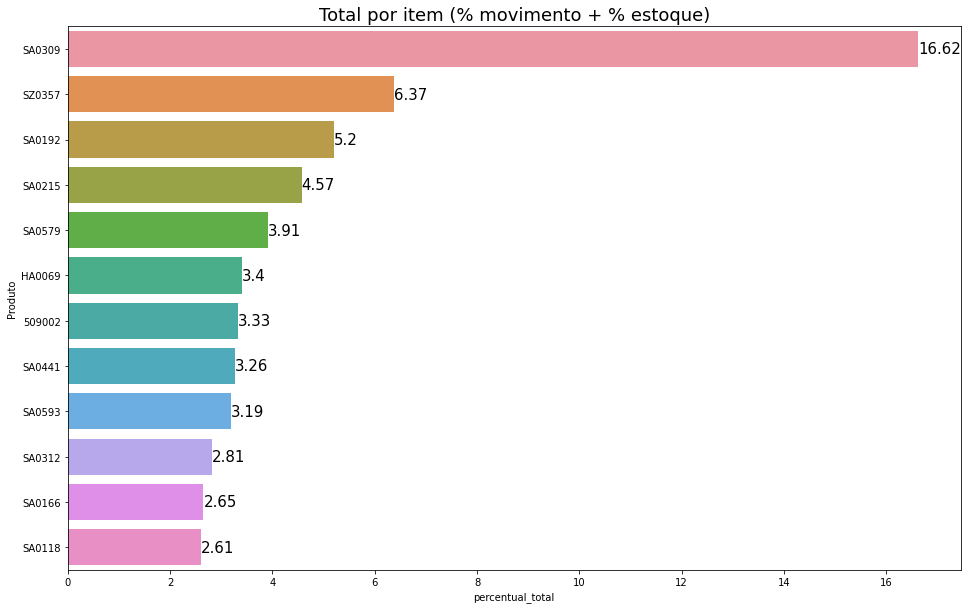

In [20]:
ax = sns.barplot(x='percentual_total', y='Produto', data=resumo_novo.query('percentual_total_acumlado <= 60'))
ax.figure.set_size_inches(16,10)
ax.set_title('Total por item (% movimento + % estoque)', fontsize=18)
ax.bar_label(ax.containers[0], size=15)
ax = ax

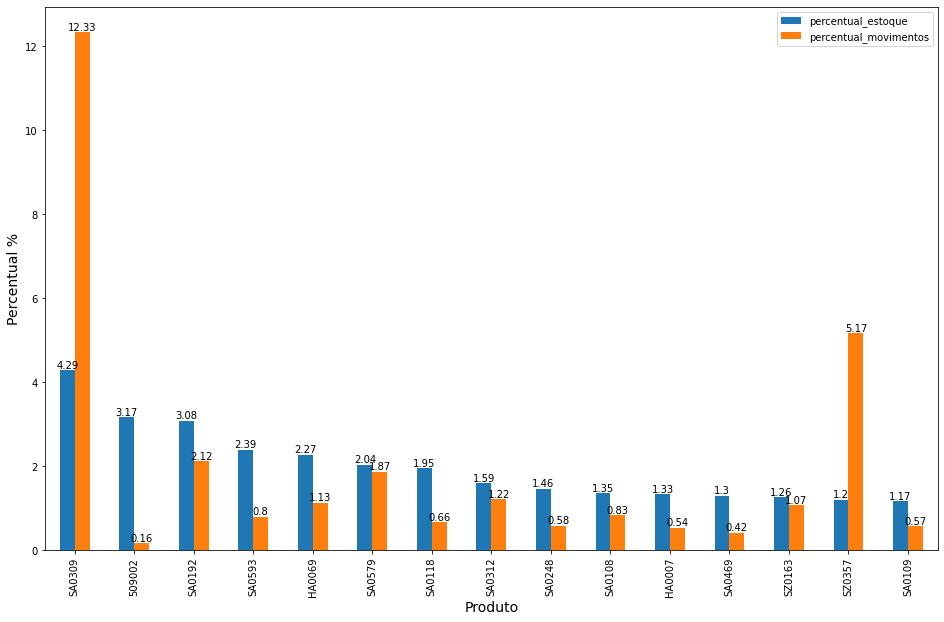

In [21]:
resumo_por_estoque_2 = resumo_por_estoque[['Produto', 'percentual_estoque', 'percentual_movimentos']]
ax = resumo_por_estoque_2.head(15).plot.bar(x='Produto')
ax.figure.set_size_inches(16,10)
ax.bar_label(ax.containers[0], size=10)
ax.bar_label(ax.containers[1], size=10)
ax.set_ylabel('Percentual %', fontsize=14)
ax.set_xlabel('Produto', fontsize=14)
ax = ax

In [22]:
# Organiza a coluna da quantidade em ordem descrescente para criar os percentuais acumulativos
resumo_por_movimento = resumo.sort_values(by=['Movimentos'], ascending=False)

# Criar os percentuais acumulativos
resumo_por_movimento['percent_movimento_acumulado'] = resumo_por_movimento['percentual_movimentos'].cumsum()

# Classificar os itens em A, B, C e criar a coluna referente
resumo_por_movimento['curva_movimento'] = resumo_por_movimento.percent_movimento_acumulado.apply(lambda x: 'A' if x <= 25 else 'B' if x <= 50 else 'C')

resumo_por_movimento.head(5)

,Produto,Qtd_UC_estoque,produto,Movimentos,percentual_estoque,percentual_movimentos,percent_movimento_acumulado,curva_movimento
0,SA0309,432,SA0309,12342,4.29,12.33,12.33,A
13,SZ0357,121,SZ0357,5172,1.20,5.17,17.50,A
15,SA0215,114,SA0215,3441,1.13,3.44,20.94,A
110,SA0441,25,SA0441,3010,0.25,3.01,23.95,A
57,SA0166,46,SA0166,2190,0.46,2.19,26.14,B


In [23]:
resumo_por_movimento_2 = resumo_por_movimento[['Produto', 'percentual_estoque', 'percentual_movimentos']]
resumo_por_movimento_2.head(5)

,Produto,percentual_estoque,percentual_movimentos
0,SA0309,4.29,12.33
13,SZ0357,1.20,5.17
15,SA0215,1.13,3.44
110,SA0441,0.25,3.01
57,SA0166,0.46,2.19


In [24]:
resumo_por_movimento_2['ponderado'] = (resumo_por_movimento_2['percentual_estoque'] + (resumo_por_movimento_2['percentual_movimentos']*2))/2
resumo_por_movimento_2.sort_values(by='ponderado', ascending=False)
resumo_por_movimento_2['ponderado_acumulado'] = resumo_por_movimento_2['ponderado'].cumsum()

C:\Users\mathe\AppData\Local\Temp\ipykernel_24112\2076654492.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resumo_por_movimento_2['ponderado'] = (resumo_por_movimento_2['percentual_estoque'] + (resumo_por_movimento_2['percentual_movimentos']*2))/2
C:\Users\mathe\AppData\Local\Temp\ipykernel_24112\2076654492.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resumo_por_movimento_2['ponderado_acumulado'] = resumo_por_movimento_2['ponderado'].cumsum()


In [25]:
resumo_por_movimento_2.query('ponderado_acumulado <= 50')

,Produto,percentual_estoque,percentual_movimentos,ponderado,ponderado_acumulado
0,SA0309,4.29,12.33,14.475,14.475
13,SZ0357,1.20,5.17,5.770,20.245
15,SA0215,1.13,3.44,4.005,24.250
110,SA0441,0.25,3.01,3.135,27.385
57,SA0166,0.46,2.19,2.420,29.805
2,SA0192,3.08,2.12,3.660,33.465
5,SA0579,2.04,1.87,2.890,36.355
37,SA0164,0.61,1.67,1.975,38.330
61,SA0155,0.43,1.66,1.875,40.205
17,SA0163,1.09,1.33,1.875,42.080


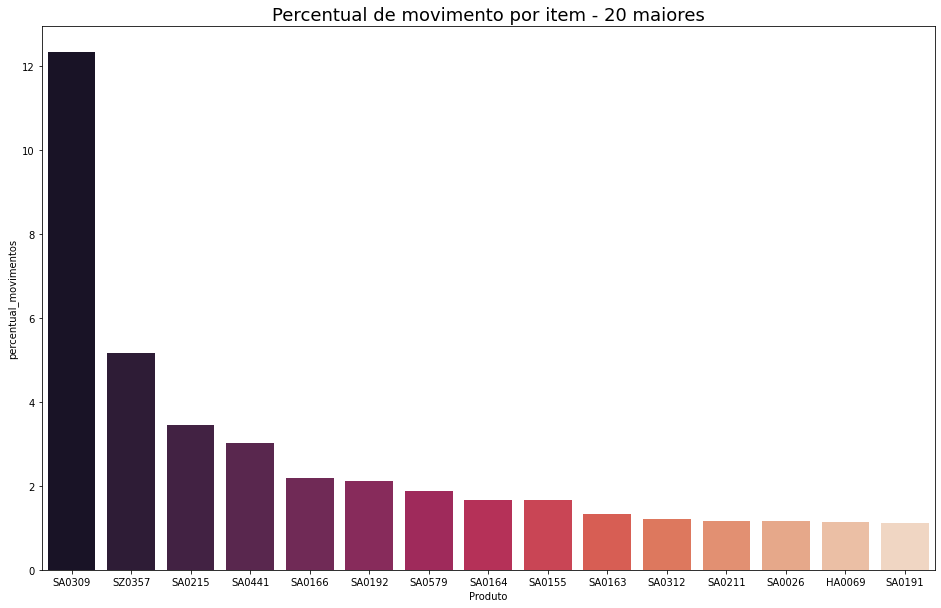

In [26]:
ax = sns.barplot(data=resumo_por_movimento.head(15), x='Produto', y='percentual_movimentos', palette='rocket')
ax.set_title('Percentual de movimento por item - 20 maiores', fontsize=18)
ax.figure.set_size_inches(16,10)
ax = ax

### Gera o dataframe de classificação combinado e exporta para csv

In [27]:
classificacao = resumo_por_estoque.merge(resumo_por_movimento, left_on='Produto', right_on='Produto')
classificacao = classificacao[['Produto', 'curva_estoque', 'curva_movimento']]
classificacao.to_csv('dados/classificacao_abc.csv', sep=',', index=None)
classificacao.head()

,Produto,curva_estoque,curva_movimento
0,SA0309,A,A
1,509002,A,C
2,SA0192,A,B
3,SA0593,A,C
4,HA0069,A,B


In [28]:
classificacao.query('curva_estoque =="A"')

,Produto,curva_estoque,curva_movimento
0,SA0309,A,A
1,509002,A,C
2,SA0192,A,B
3,SA0593,A,C
4,HA0069,A,B
5,SA0579,A,B
6,SA0118,A,C
7,SA0312,A,B
8,SA0248,A,C
9,SA0108,A,B


#### Analisando a MB51 do item SA0309

In [29]:
mb52_sa0309.sample(5)

,Material,Centro,Depósito,Tipo de movimento,Estoque especial,Doc.material,Item doc.material,Data de lançamento,Qtd. UM registro,UM registro
401,SA0309,P703,5,601,NaN,4901646618,5,2022-04-14,-143.8,KG
531,SA0309,P703,5,601,NaN,4901635806,7,2022-04-13,-148.6,KG
1539,SA0309,P703,5,601,NaN,4901472152,8,2022-04-05,-72.0,BOB
819,SA0309,P703,5,101,NaN,5000520301,1,2022-04-11,148.0,KG
1883,SA0309,P703,5,601,NaN,4901406522,11,2022-04-02,-146.8,KG


In [30]:
analise = mb52_sa0309.drop(['Centro', 'Depósito', 'Estoque especial', 'Doc.material', 'Item doc.material'], axis='columns')

In [31]:
analise.head(10)

,Material,Tipo de movimento,Data de lançamento,Qtd. UM registro,UM registro
0,SA0309,601,2022-04-20,-146.2,KG
1,SA0309,601,2022-04-20,-143.8,KG
2,SA0309,601,2022-04-20,-144.0,KG
3,SA0309,601,2022-04-20,-146.2,KG
4,SA0309,601,2022-04-20,-146.0,KG
5,SA0309,601,2022-04-20,-143.6,KG
6,SA0309,601,2022-04-20,-140.8,KG
7,SA0309,601,2022-04-20,-140.4,KG
8,SA0309,601,2022-04-20,-143.0,KG
9,SA0309,101,2022-04-20,145.8,KG


In [32]:
info = analise.groupby('Data de lançamento')['Tipo de movimento'].value_counts().rename_axis(['data_movimento','tipo_movimento'])
info = info.to_frame()
info = info.reset_index()
info.rename(columns={'Tipo de movimento':'qtd_movimento'}, inplace=True)
info.head()

,data_movimento,tipo_movimento,qtd_movimento
0,2022-04-01,101,77
1,2022-04-01,601,28
2,2022-04-02,601,14
3,2022-04-04,601,137
4,2022-04-04,101,59


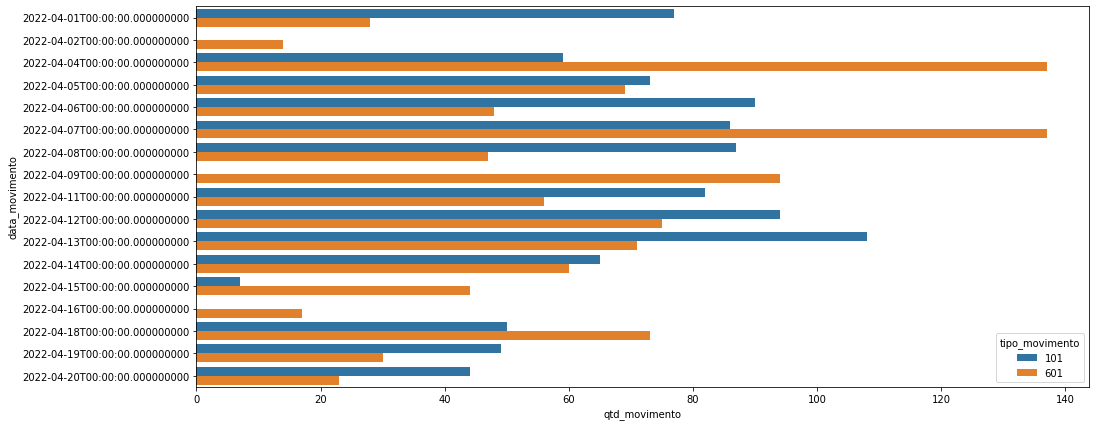

In [33]:
ax = sns.barplot(x='qtd_movimento', y='data_movimento', hue='tipo_movimento', data=info)
ax.figure.set_size_inches(16,7)
#info.plot.bar()

#### Análise MB51 SA0192

In [34]:
mb51_sa0192 = pd.read_excel(path+file_mb51_sa0192)
mb51_sa0192.head()

,Material,Centro,Depósito,Tipo de movimento,Estoque especial,Doc.material,Item doc.material,Data de lançamento,Qtd. UM registro,UM registro
0,SA0192,P703,5,101,NaN,5000581250,1,2022-04-20,489.1,KG
1,SA0192,P703,5,101,NaN,5000581250,2,2022-04-20,488.6,KG
2,SA0192,P703,5,101,NaN,5000581250,3,2022-04-20,489.6,KG
3,SA0192,P703,5,101,NaN,5000581250,4,2022-04-20,495.6,KG
4,SA0192,P703,5,101,NaN,5000581250,5,2022-04-20,492.1,KG


In [35]:
analise_sa0192 = mb51_sa0192.drop(['Centro', 'Depósito', 'Estoque especial', 'Doc.material', 'Item doc.material'], axis='columns')
analise_sa0192

,Material,Tipo de movimento,Data de lançamento,Qtd. UM registro,UM registro
0,SA0192,101,2022-04-20,489.1,KG
1,SA0192,101,2022-04-20,488.6,KG
2,SA0192,101,2022-04-20,489.6,KG
3,SA0192,101,2022-04-20,495.6,KG
4,SA0192,101,2022-04-20,492.1,KG
...,...,...,...,...,...
682,SA0192,101,2022-04-04,476.6,KG
683,SA0192,101,2022-04-04,468.1,KG
684,SA0192,601,2022-04-01,-493.7,KG
685,SA0192,601,2022-04-01,-2438.1,KG


In [36]:
info = analise_sa0192.groupby('Data de lançamento')['Tipo de movimento'].value_counts().rename_axis(['data_movimento','tipo_movimento'])
info = info.to_frame()
info = info.reset_index()
info.rename(columns={'Tipo de movimento':'qtd_movimento'}, inplace=True)
info.head()

,data_movimento,tipo_movimento,qtd_movimento
0,2022-04-01,601,3
1,2022-04-04,101,9
2,2022-04-05,101,22
3,2022-04-05,601,3
4,2022-04-06,101,157


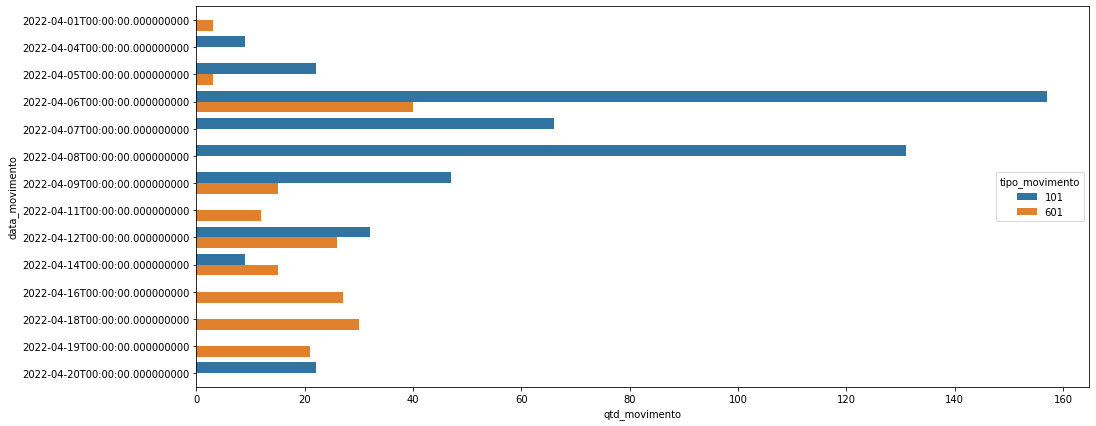

In [37]:
ax = sns.barplot(x='qtd_movimento', y='data_movimento', hue='tipo_movimento', data=info)
ax.figure.set_size_inches(16,7)

### Análise MB51 - Itens curva A
<p>SA0309
<p>SA0192
<p>HA0069
<p>SA0579

In [38]:
mb51 = pd.read_excel('dados/EXPORT_MB51_A.xlsx')

In [39]:
dados = mb51[['Material', 'Tipo de movimento', 'Data de lançamento']]
dados.rename(columns={'Material':'material', 'Tipo de movimento':'tipo_movimento', 'Data de lançamento':'data_lancamento'}, inplace=True)
dados['data_lancamento'] = pd.to_datetime(dados['data_lancamento'], format='%d/%m/%Y')
dados

C:\Users\mathe\AppData\Local\Temp\ipykernel_24112\2682226201.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados.rename(columns={'Material':'material', 'Tipo de movimento':'tipo_movimento', 'Data de lançamento':'data_lancamento'}, inplace=True)
C:\Users\mathe\AppData\Local\Temp\ipykernel_24112\2682226201.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados['data_lancamento'] = pd.to_datetime(dados['data_lancamento'], format='%d/%m/%Y')


,material,tipo_movimento,data_lancamento
0,HA0069,601,2022-04-22
1,HA0069,601,2022-04-22
2,HA0069,601,2022-04-22
3,HA0069,601,2022-04-18
4,HA0069,601,2022-04-18
...,...,...,...
3650,SA0579,101,2022-04-01
3651,SA0579,101,2022-04-01
3652,SA0579,601,2022-04-01
3653,SA0579,601,2022-04-01


In [40]:
dados.dtypes

material                   object
tipo_movimento              int64
data_lancamento    datetime64[ns]
dtype: object